In [1]:
# mnist  my best model
import torch
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms


100
shape label torch.Size([1, 28, 28]) 5


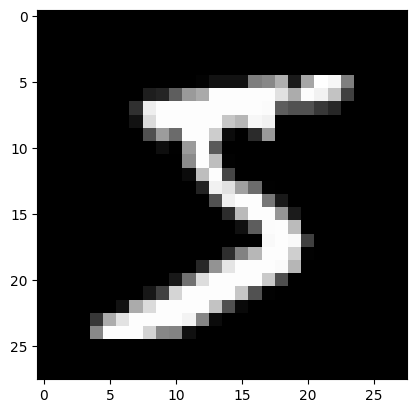

In [2]:

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])


trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)

testset=datasets.MNIST('~/.pytorch/MNIST_data/',download=True,train=False,transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)
image,label=trainset[0]
print(len(testloader))

print("shape label",image.shape,label)
plt.imshow(image.view(28,28),cmap="gray")

In [3]:
# import torch
# model = nn.Sequential(nn.Linear(784, 64),
#                       nn.ReLU(),
# #                       nn.Linear(128, 64),
# #                       nn.ReLU(),
#                       nn.Linear(64, 10),
#                       nn.LogSoftmax(dim=1))

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten=nn.Flatten()
        self.linear=nn.Linear(784,10)
#         self.hidden = nn.Linear(784, 256)
#         self.output = nn.Linear(256, 10)
#         self.relu = nn.ReLU()
#         self.softmax = nn.Softmax(dim=1)
    def forward(self, x):
        # Pass the input tensor through each of our operations
        #x = x.view(-1,28 * 28)
        x=self.flatten(x)
        x=self.linear(x)
#         x = self.hidden(x)
#         x = self.relu(x)
#         x = self.output(x)
#         x = self.softmax(x)
        
        return x
    
model=Network()
print(model)

learning_rate=0.001
epochs=30
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
for e in range(epochs):
    correct=0
    i=0
    
    for (images, labels) in (trainloader):
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        _,pred=torch.max(output,1)
        i=i+1
        #total += labels.size(0)
        correct+=(pred==labels).sum() 
   
    print(f"epoch: {e+1} , Training loss: {loss.item()},accuracy:{(correct/len(trainset))*100:.2f},%")
    print(i)
    print(correct)

Network(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=784, out_features=10, bias=True)
)
epoch: 1 , Training loss: 1.0677729845046997,accuracy:63.32,%
600
tensor(37991)
epoch: 2 , Training loss: 0.7429924011230469,accuracy:81.55,%
600
tensor(48931)
epoch: 3 , Training loss: 0.4803638458251953,accuracy:84.25,%
600
tensor(50549)
epoch: 4 , Training loss: 0.5995876789093018,accuracy:85.39,%
600
tensor(51234)
epoch: 5 , Training loss: 0.5637937188148499,accuracy:86.19,%
600
tensor(51715)
epoch: 6 , Training loss: 0.48700377345085144,accuracy:86.65,%
600
tensor(51989)
epoch: 7 , Training loss: 0.5136681199073792,accuracy:87.09,%
600
tensor(52254)
epoch: 8 , Training loss: 0.4655643105506897,accuracy:87.40,%
600
tensor(52441)
epoch: 9 , Training loss: 0.4464135468006134,accuracy:87.70,%
600
tensor(52621)
epoch: 10 , Training loss: 0.5437327027320862,accuracy:88.01,%
600
tensor(52809)
epoch: 11 , Training loss: 0.45655712485313416,accuracy:88.20,%
600
tensor(52

In [4]:
with torch.no_grad():
    #dont calculate grad during testing
    i=0
    correct=0
    total=0
    for (images,labels) in (testloader):
        output = model(images)
        _,pred=torch.max(output.data,1)
        i=i+1
        correct+=(pred==labels).sum()
        total += labels.size(0)
    print(i)
    print(f"accuracy:{(correct/total)*100:.2f},%")

100
accuracy:90.51,%


In [5]:

with torch.no_grad():
    #dont calculate grad during testing
    correct = 0
    total = 0
    i=0
    for (images, labels) in (testloader):
        output = model(images)
        _,pred=torch.max(output.data,1)
        i=i+1
        correct+=(pred==labels).sum()
    print(i)
    print(len(testloader))
    print(f"accuracy:{(correct/len(testset))*100:.2f},%")

100
100
accuracy:90.51,%


In [6]:
https://books.google.co.in/books?hl=en&lr=&id=ESKEDwAAQBAJ&oi=fnd&pg=PP1&dq=Training+Neural+Network+using+PyTorch&ots=y4MrWVqn-U&sig=mndtmNqg2q0wH8zJ-3DifXaojOo#v=onepage&q=Training%20Neural%20Network%20using%20PyTorch&f=false

SyntaxError: invalid decimal literal (1427205182.py, line 1)

In [ ]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10
# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)


In [ ]:
from torch import nn
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [ ]:
# Create the network and look at it's text representation
model = Network()
model

In [16]:
x = torch.tensor([
     [1, 2, 3],
     [4, 5, 6]
   ])
print(x.device)

# print(torch.sum(x,axis=0,keepdims=True))
# print(torch.sum(x,dim=0))
print(x)
# print(torch.sum(x,axis=1,keepdims=True))


cpu
tensor([[1, 2, 3],
        [4, 5, 6]])


In [ ]:
# Import dependencies
import torch 
from PIL import Image
from torch import nn, save, load
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Get data 
train = datasets.MNIST(root="data", download=True, train=True, transform=ToTensor())
dataset = DataLoader(train, 32)
#1,28,28 - classes 0-9

# Image Classifier Neural Network
class ImageClassifier(nn.Module): 
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, (3,3)), 
            nn.ReLU(),
            nn.Conv2d(32, 64, (3,3)), 
            nn.ReLU(),
            nn.Conv2d(64, 64, (3,3)), 
            nn.ReLU(),
            nn.Flatten(), 
            nn.Linear(64*(28-6)*(28-6), 10)  
        )

    def forward(self, x): 
        return self.model(x)
clf = ImageClassifier().to('cuda')
opt = Adam(clf.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss() 

# Training flow 
if __name__ == "__main__": 
    for epoch in range(10): # train for 10 epochs
        for batch in dataset: 
            X,y = batch 
            X, y = X.to('cuda'), y.to('cuda') 
            yhat = clf(X) 
            loss = loss_fn(yhat, y) 

            # Apply backprop 
            opt.zero_grad()
            loss.backward() 
            opt.step() 

        print(f"Epoch:{epoch} loss is {loss.item()}")
    
    with open('model_state.pt', 'wb') as f: 
        save(clf.state_dict(), f) 

    with open('model_state.pt', 'rb') as f: 
        clf.load_state_dict(load(f))  

    img = Image.open('img_3.jpg') 
    img_tensor = ToTensor()(img).unsqueeze(0).to('cuda')

    print(torch.argmax(clf(img_tensor)))

In [ ]:
import torch
p=torch.tensor([[[-0.0665,  2.7976,  0.9753],[1,2,3],[1,2,3]]])
print(p)
print(p.size())
# Get the maximum along dim = 0 (axis = 0)
k=p.view(p.shape[0],-1)

print(k.size())
print(k)

In [17]:
torch.cuda.is_available()
x = torch.tensor([
     [1, 2, 3],
     [4, 5, 6]
   ])
print(x.device)


cpu


In [ ]:
import torch
from torch.autograd import Variable

x_data = Variable(torch.Tensor([[1.0], [2.0], [3.0]]))
y_data = Variable(torch.Tensor([[2.0], [4.0], [6.0]]))


class LinearRegressionModel(torch.nn.Module):

	def __init__(self):
		super(LinearRegressionModel, self).__init__()
		self.linear = torch.nn.Linear(1, 1) # One in and one out

	def forward(self, x):
		y_pred = self.linear(x)
		return y_pred

# our model
our_model = LinearRegressionModel()

criterion = torch.nn.MSELoss(size_average = False)
optimizer = torch.optim.SGD(our_model.parameters(), lr = 0.01)

for epoch in range(500):

	# Forward pass: Compute predicted y by passing
	# x to the model
	pred_y = our_model(x_data)

	# Compute and print loss
	loss = criterion(pred_y, y_data)

	# Zero gradients, perform a backward pass,
	# and update the weights.
	optimizer.zero_grad()
	loss.backward()
	optimizer.step()
	print('epoch {:.6f}, loss {:.6f}'.format(epoch, loss.item()))

new_var = Variable(torch.Tensor([[4.0]]))
pred_y = our_model(new_var)
print(f"predict {our_model(new_var).item():.3f}")

In [1]:
import torch
import torch.nn as nn
import numpy as np
torch.nn.Module
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# 0) Prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))
print(y_test.shape)
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)
print(y_test.shape)
model =LogisticRegression()
# 1) Model
# Linear model f = wx + b , sigmoid at the end
class Model(nn.Module):
    def __init__(self, n_input_features):
         super(Model, self).__init__()

         self.linear = nn.Linear(n_input_features, 1)
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_features)

# 2) Loss and optimizer
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')


torch.Size([114])
torch.Size([114, 1])
epoch: 10, loss = 0.4816
epoch: 20, loss = 0.4132
epoch: 30, loss = 0.3672
epoch: 40, loss = 0.3338
epoch: 50, loss = 0.3083
epoch: 60, loss = 0.2880
epoch: 70, loss = 0.2714
epoch: 80, loss = 0.2575
epoch: 90, loss = 0.2456
epoch: 100, loss = 0.2353
accuracy: 0.9211
